## Constantes et modules

In [10]:
## À REMPLIR AU FUR ET À MESURE

import numpy as np
import matplotlib.pyplot as plt

g = 9.80665

## Question 3

On veut maintenant déterminer l'énergie totale du système. On sait que l'énergie potentielle du pendule double est donnée par :
$$V = -mgl(2\cos\theta_1 + \cos\theta_2)$$
L'énergie cinétique du système est donnée par :
$$T = ml^2\bigg[\dot{\theta}_1^2 + \frac{1}{2}\dot{\theta}_2^2 + \dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2)\bigg]$$
On remplace $\dot{\theta}_1$ et $\dot{\theta}_2$ par $\omega_1$ et $\omega_1$ :
$$T = ml^2\bigg[\omega_1^2 + \frac{1}{2}\omega_2^2 + \omega_1\omega_2\cos(\theta_1 - \theta_2)\bigg]$$
On peut donc facilement déterminer l'énergie totale du système :
$$E = T + V$$
$$E = ml^2\bigg[\omega_1^2 + \frac{1}{2}\omega_2^2 + \omega_1\omega_2\cos(\theta_1 - \theta_2)\bigg] - mgl(2\cos\theta_1 + \cos\theta_2)$$

Comme on ne considère pas de friction dans le système, l'énergie totale devrait être constante en tout temps. Toutefois, à cause des différentes méthodes numériques que nous allons utiliser, cette grandeur variera légèrement. À partir de maintenant, on considérera qu'une variation d'énergie de moins de $10^{-5}$ J est négligeable. La précision des méthodes numériques que nous utiliserons devront donc comporter une erreur qui cause une variation au-dessous de ce seuil. Cette valeur sert donc de critère de précision pour les méthodes utilisées.

$$\textcolor{red}{\text{C'est court, mais jsp qu'est-ce qu'on peut ajouter ici}}$$

## Question 4

#### 4.1 Méthode Runge-Kutta

On veut maintenant résoudre les équations du mouvement du pendule. Pour ce faire, on souhaite implémenter une méthode numérique de résolution d'équations différentielles ordinaires d'ordre 1. On choisit la méthode de Runge-Kutta d'ordre 4, car celle-ci permet d'obtenir une grande précision tout en restant simple à implémenter. On commence donc par coder la fonction *runge_kutta_4* qui prend en argument une fonction *f* représentant l'expression de $\frac{\text{d}x}{\text{d}t}$ où $x(t)$ est la solution de l'équation différentielle, la valeur initiale $x_0$ de la fonction au début de l'intervalle d'intérêt, l'intervalle $a,\ b$ où on veut connaître la fonction $x(t)$ et un nombre $N$ correspondant au nombre de tranches souhaité dans l'intervalle. La fonction *runge_kutta_4* utilise ensuite la méthode Runge-Kutta d'ordre 4 $\textcolor{red}{text{[Newmann, Section 8.1.3]}}$ pour déterminer $x(t)$. Elle retourne ensuite *t* et *x*, qui sont respectivement un *array numpy* à une dimension comprenant les valeurs de temps et une liste comprenant les valeurs de $x(t)$ sur l'intervalle de *a* à *b*.

In [11]:
# Implémentation de la méthode Runge-Kutta de quantrième ordre
# Arguments :
# f : fonction f(x, t) représentant l'expression de la première dérivée de x
# x_0 : valeur initiale x(a) de la fonction au début de l'intervalle
# a, b : intervalle où on veut connaître x
# N : nombre de tranches souhaité dans l'intervalle a, b
# Retourne :
# x : liste des valeurs de la fonction x(t)
# t : array 1D des valeurs de temps

def runge_kutta_4(f, x_0, a, b, N):
    t = np.linspace(a, b, N)
    x = [x_0]
    # calcul du pas h
    h = (b - a) / N
    for i in range(len(t)):
        # grandeurs k_1, k_2, k_3, k_4 propres à Runge-Kutta de 4e ordre
        k_1 = h * f(x[i], t[i])
        k_2 = h * f(x[i] + k_1/2, t[i] + h/2)
        k_3 = h * f(x[i] + k_2/2, t[i] + h/2)
        k_4 = h * f(x[i] + k_3, t[i] + h)
        # calcul de la prochaine valeur de x
        x.append(x[i] + (k_1 + 2*k_2 + 2*k_3 + k_4) / 6)
    return x, t

#### 4.2 Équations du mouvement

On veut maintenant coder les équations du mouvement. Le pendule double comporte 4 équations du mouvement, qui sont données plus haut. Pour résoudre un système d'équations différentielles à plusieurs variables, on peut utiliser la fonction *runge-kutta_4* en lui passant une fonction *f* qui prend en argument une liste *x* comprenant les valeurs des 4 variables et une valeur de *t*. Dans notre cas, on nomme cette fonction *equations_penddouble* et celle-ci prend en argument une liste *x* qui comprend les valeurs de $\theta_1$, $\theta_2$, $\omega_1$ et $\omega_2$ et une valeur de temps *t*. Celle-ci utilise alors les 4 équations du mouvement pour construire la liste *dot_x* qui comprend les valeurs de $\dot{\theta}_1$, $\dot{\theta}_2$, $\dot{\omega}_1$ et $\dot{\omega}_2$. la fonction retourne ensuite *array_dot_x*, qui correspond à *dot_x* convertie en *array*. On considère ici que les tiges des pendules sont de longueur $l=40$ cm.

In [12]:
# Équations du mouvement du pendule double
# Arguments :
# x : liste comprenant les valeurs de theta_1 [rad], theta_2 [rad], omega_1 [rad/s], omega_2 [rad/s] (dans cet ordre)
# t : valeur de temps [s] (non-utilisée, mais doit être présente pour la compatibilité avec runge_kutta_4)
# Retourne :
# array_dot_x : array 1D comprenant les dérivées temporelles des 4 variables dépendantes (même ordre et mêmes unités que x)

def equations_penddouble(x, t):
    # on renomme les variables pour simplifier la notation
    t1 = x[0]
    t2 = x[1]
    o1 = x[2]
    o2 = x[3]
    # on définit la longueur de 40 cm
    l = 0.40
    # on crée la liste des dérivées
    dot_x = []
    # dérivées de theta_1 et theta_2
    dot_x.append(o1)
    dot_x.append(o2)
    # dérivées de omega_1 et omega_2
    dot_omega_1 = -(o1**2 * np.sin(2*t1-2*t2) + 2*o2**2*np.sin(t1-t2) + g/l * (np.sin(t1-2*t2) + 3*np.sin(t1))) / (3-np.cos(2*t1-2*t2))
    dot_omega_2 = (4*o1**2 * np.sin(t1-t2) + o2**2*np.sin(2*t1-2*t2) + 2*g/l * (np.sin(2*t1-t2) - np.sin(t2))) / (3-np.cos(2*t1-2*t2))
    dot_x.append(dot_omega_1)
    dot_x.append(dot_omega_2)
    return np.array(dot_x)

#### 4.3 Résolution des équations du mouvement

On peut maintenant utiliser la méthode *runge_kutta_4* et la fonction *equations_penddouble* pour résoudre les équations du mouvement selon la méthode de Runge-Kutta d'ordre 4'. On considère les conditions initiales suivantes : $\theta_1 = \theta_2 = 90\degree$, $\omega_1=\omega_2=0$. On s'intéresse au comportement du pendule de $t=0$ à $t=100$ s avec $N=100\ 000$ tranches. On trace ensuite les positions angulaires $\theta_1$ et $\theta_2$ sur l'intervalle d'intérêt.

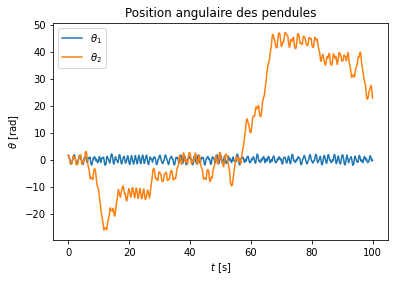

In [21]:
# définition des conditions initiales (en radians)
cond_init = [np.pi/2, np.pi/2, 0, 0]

# résolution des équations du mouvement
result, t = runge_kutta_4(equations_penddouble, cond_init, 0, 100, 100000)

# on trace le résultat

theta_1 = []
for v in result:
    theta_1.append(v[0])

theta_2 = []
for v in result:
    theta_2.append(v[1])

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.title('Position angulaire des pendules')
plt.ylabel('$θ$ [rad]')
plt.xlabel('$t$ [s]')
plt.plot(t, theta_1[:-1], label="$θ_1$")
plt.plot(t, theta_2[:-1], label="$θ_2$")
plt.legend()
plt.show()

On remarque que le pendule semble faire plus de tours complets que le pendule 1, car sa position angulaire varie sur un plus grand intervalle. Toutefois, comme le pendule double est un système chaotique, il comporte une très grande sensibilité aux conditions initiales et à la valeur numérique des constantes. Pour montrer cette caractéristique du système, on peut refaire la résolution des équations du mouvement en arrondissant la valeur de *g* définie au début du document.

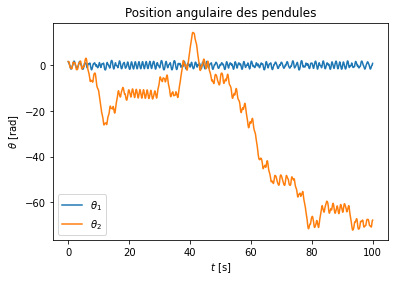

In [25]:
# on redéfinit la valeur de g
g = 9.8

# définition des conditions initiales (en radians)
cond_init = [np.pi/2, np.pi/2, 0, 0]

# résolution des équations du mouvement
result_2, t_2 = runge_kutta_4(equations_penddouble, cond_init, 0, 100, 100000)

# on trace le résultat

theta_1_2 = []
for v in result_2:
    theta_1_2.append(v[0])

theta_2_2 = []
for v in result_2:
    theta_2_2.append(v[1])

fig2 = plt.figure()
fig2.patch.set_facecolor('white')
plt.title('Position angulaire des pendules')
plt.ylabel('$θ$ [rad]')
plt.xlabel('$t$ [s]')
plt.plot(t_2, theta_1_2[:-1], label="$θ_1$")
plt.plot(t_2, theta_2_2[:-1], label="$θ_2$")
plt.legend()
plt.show()

# on redéfinit la valeur initiale de g
g = 9.80665

On observe que le comportement du pendule 2 change radicalement après environ 20 s par rapport à la valeur initiale de *g*. Les résultats prédits ici ont donc une portée limitée, car de nombreux facteurs peuvent les faire varier de façon importante.

## Question 5

On veut maintenant observer comment varie l'énergie totale du système selon le comportement trouvé à la question 4. Pour ce faire, on crée la fonction *energie_tot*, qui prend en argument une liste *x* comprenant les valeurs des 4 variables indépendantes. Elle retourne ensuite l'énergie totale du système en Joules en la calculant selon l'équation déterminée à l'équation 3. On considère une masse $m=1$ kg, donc celle-ci disparaît de l'équation.

In [23]:
# Énergie totale du système
# Arguments :
# x : liste des valeurs de theta_1, theta_2, omega_1, omega_2 en [rad] et [rad/s]
# Retourne :
# E : énergie totale du système [J]

def energie_tot(x):
    # on renomme les variables pour simplifier la notation
    t1 = x[0]
    t2 = x[1]
    o1 = x[2]
    o2 = x[3]
    # longueur de la tige à 40 cm
    l = 0.40
    # calcul de l'énergie
    E = l**2 * (o1**2 + o2**2/2 + o1*o2*np.cos(t1-t2)) - g*l*(2*np.cos(t1) + np.cos(t2))
    return E

On utilise maintenant notre nouvelle fonction pour calculer et représenter graphiquement l'énergie totale du pendule de $t=0$ à $t=100$ s. On calcule également la variation entre les valeurs d'énergie maximale et minimale.

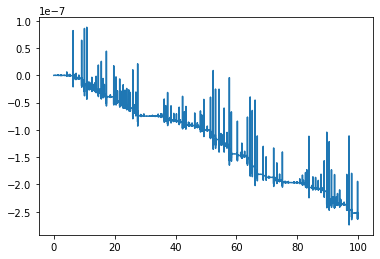

La plus grande variation d'énergie est de 3.624234707899632e-07 J.


In [26]:
# Calcul de l'énergie de 0 à 100 s
energie = []
for x in result:
    energie.append(energie_tot(x))

# représentation graphique
fig3 = plt.figure()
fig3.patch.set_facecolor('white')
plt.plot(t, energie[:-1])
plt.show()

# différence entre max et min
var_energie = max(energie) - min(energie)
print("La plus grande variation d'énergie est de", var_energie, "J.")

La variation d'énergie est inférieure au seuil de $10^{-5}$ J que nous avions défini. La méthode Runge-Kutta d'ordre 4 avec 10 000 tranches atteint donc la précision souhaitée pour résoudre les équations du mouvement du pendule double.


SYMPLECTIQUE !?!?!?!?!?!?!?!?